##### Naive Bayes Classification

##### Dataset

Download `divorce.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/divorce.csv', sep=';')
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [11]:
df.shape

(170, 55)

Separate the input and output data

In [12]:
# input data
x = df.drop('Class', axis=1)

# output data
y = df['Class']

In [13]:
x.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


<Axes: xlabel='count', ylabel='Class'>

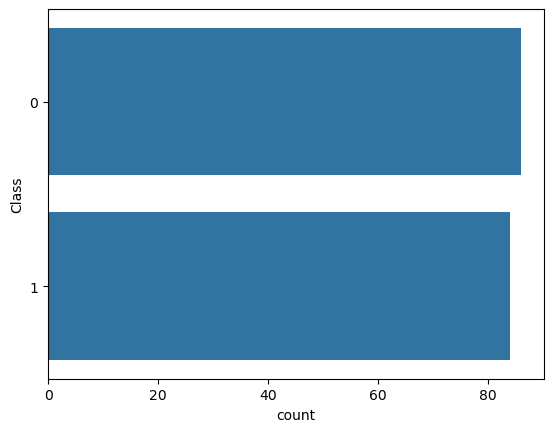

In [14]:
sns.countplot(y=y)

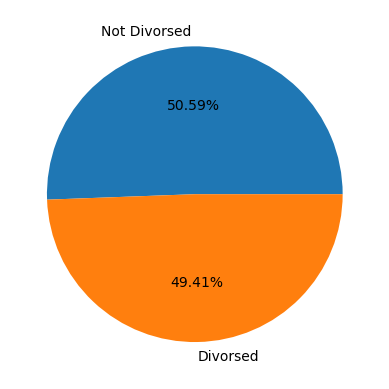

In [18]:
plt.pie(y.value_counts(), labels=['Not Divorsed', 'Divorsed'], autopct='%.2f%%'); 

##### Cross-Validation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 54), (43, 54), (127,), (43,))

##### Build the model

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb = GaussianNB()

In [24]:
nb.fit(x_train, y_train)

GaussianNB()

##### Performance Evaluation

In [25]:
y_pred = nb.predict(x_test)

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

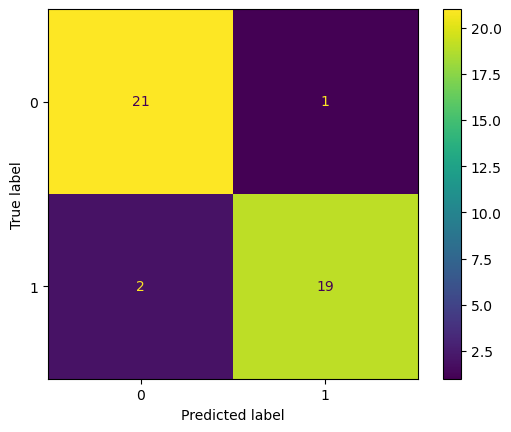

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
accuracy_score(y_test, y_pred)

0.9302325581395349

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.95      0.90      0.93        21

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43



In [34]:
nb.predict_proba(x_test)

array([[1.00000000e+000, 5.62517596e-118],
       [1.00000000e+000, 3.09313322e-091],
       [1.00000000e+000, 3.80451213e-115],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 5.11321880e-114],
       [8.09087798e-253, 1.00000000e+000],
       [1.00000000e+000, 2.67721389e-139],
       [1.00000000e+000, 4.18615201e-116],
       [1.00000000e+000, 1.95349212e-146],
       [1.00000000e+000, 6.50819359e-110],
       [1.00000000e+000, 1.00293421e-065],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 8.29199197e-136],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.04626032e-145],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.80409993e-106],
       [1.00000000e+000, 1.78110535e-054],
       [1.00000000e+000, 4.98692248e-144],
       [1.0

In [36]:
new = x_train.loc[[23]]
new

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
23,3,3,3,4,3,1,1,3,3,4,...,4,4,4,4,4,4,4,4,4,4


In [37]:
nb.predict(new)

array([1], dtype=int64)